In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !export LD_LIBRARY_PATH=/home/guilherme/anaconda3/envs/rlgpu/lib
# import isaacgym
# import torch

In [3]:
from typing import Dict, List, Optional, Tuple, Union
from aerial_gym.robot_generator.drone_generator import generate_random_drone
from aerial_gym.robot_generator.models.drone_modules import DroneConfig
from aerial_gym.utils.drone_cfg_plotter import pĺot_drone

AERIAL_GYM_ROOT_DIR /home/guilherme/phd/my_work/aerial_gym_simulator
Importing module 'gym_37' (/home/guilherme/phd/simulation/isaacgym/python/isaacgym/_bindings/linux-x86_64/gym_37.so)


ImportError: libpython3.7m.so.1.0: cannot open shared object file: No such file or directory

chosen_connectors: [2, 1, 4, 5, 3]
chosen_connectors: [1, 6, 5]
Module 0 position: (0.0, 0.0)
Module 1 position: (0.13856406460551018, 0.08)
Module 2 position: (0.0, 0.16)
Module 3 position: (0.0, -0.16)
Module 4 position: (-0.13856406460551018, -0.08)
Module 5 position: (0.13856406460551018, -0.08)
Module 6 position: (0.0, 0.32)
Module 7 position: (-0.13856406460551018, 0.24)
Module 8 position: (-0.13856406460551018, 0.08)


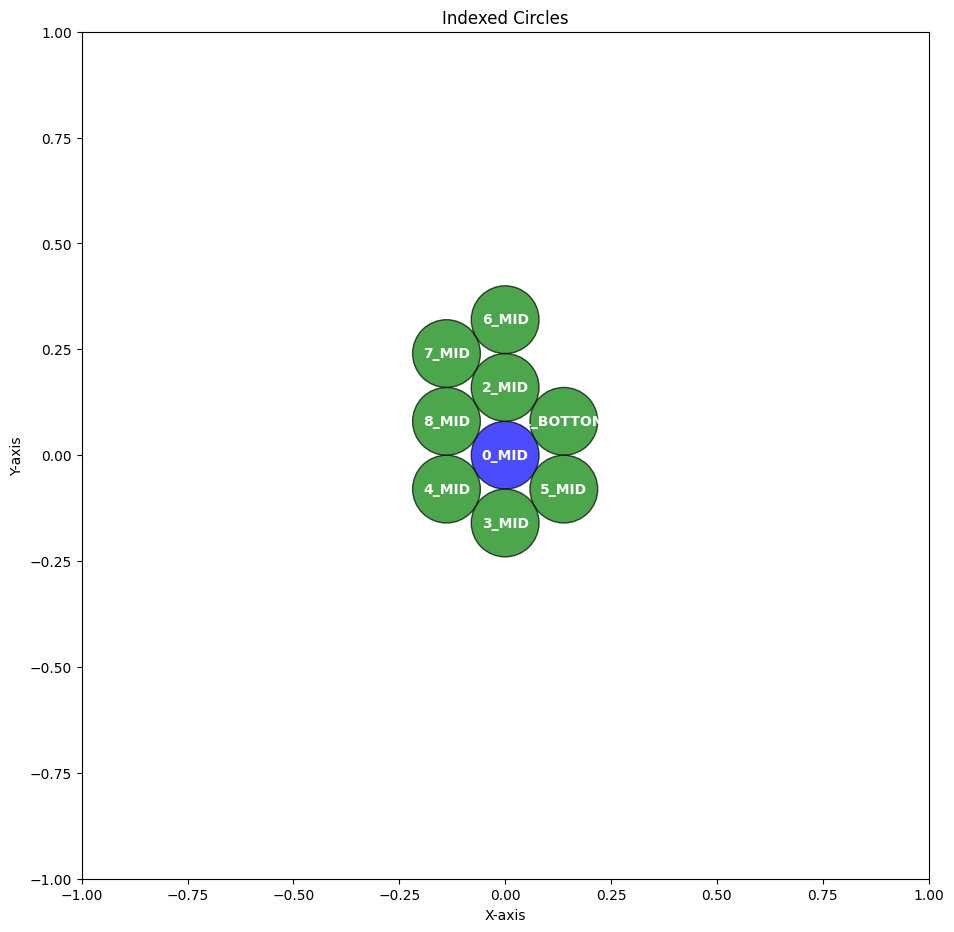

In [41]:
drone = generate_random_drone(num_propellers=8, num_bases=1, allow_unevenness=True)
pĺot_drone(drone)

In [4]:
def dronecfg_to_urdf(name: str, drone: DroneConfig) -> Dict:
    """Converts a DroneConfig object into a URDF representation of it.
    
    Args:
        drone (DroneConfig): The DroneConfig object to convert.
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
    Returns:
        Dict: The URDF representation of the DroneConfig object.
    
    Raises:
        ValueError: If the DroneConfig object is invalid.
    
    Example:
        >>> dronecfg_to_urdf(drone)
        <?xml version="1.0"?>
            <robot name="modular_1">
            <link name="base_link">
                <visual>
                <origin xyz="0 0 0.0"/>
                <geometry>
                    <cylinder radius="0.08" length="0.025"/>
                </geometry>
                <material name="White">
                    <color rgba="1 1 1 1.0"/>
                </material>
                </visual>
                <collision>
                <origin xyz="0 0 0"/>
                <geometry>
                    <sphere radius="0.08"/>
                </geometry>
                </collision>
                <inertial>
                <mass value="0.76"/>
                <inertia ixx="0.00243" ixy="0.0" ixz="0.0" iyy="0.00243" iyz="0.0" izz="0.00243"/>
                </inertial>
            </link>
            <link name="base_link_1">
                <visual>
                <origin xyz="0 0 0.0"/>
                <geometry>
                    <cylinder radius="0.08" length="0.025"/>
                </geometry>
                <material name="White">
                    <color rgba="1 1 1 1.0"/>
                </material>
                </visual>
                <collision>
                <origin xyz="0 0 0"/>
                <geometry>
                    <sphere radius="0.08"/>
                </geometry>
                </collision>
                <inertial>
                <mass value="0.76"/>
                <inertia ixx="0.00243" ixy="0.0" ixz="0.0" iyy="0.00243" iyz="0.0" izz="0.00243"/>
                </inertial>
            </link>
            <link name="base_link_2">
                <visual>
                <origin xyz="0 0 0.0"/>
                <geometry>
                    <cylinder radius="0.08" length="0.025"/>
                </geometry>
                <material name="White">
                    <color rgba="1 1 1 1.0"/>
                </material>
                </visual>
                <collision>
                <origin xyz="0 0 0"/>
                <geometry>
                    <sphere radius="0.08"/>
                </geometry>
                </collision>
                <inertial>
                <mass value="0.76"/>
                <inertia ixx="0.00243" ixy="0.0" ixz="0.0" iyy="0.00243" iyz="0.0" izz="0.00243"/>
                </inertial>
            </link>
            <link name="base_link_3">
                <visual>
                <origin xyz="0 0 0.0"/>
                <geometry>
                    <cylinder radius="0.08" length="0.025"/>
                </geometry>
                <material name="White">
                    <color rgba="1 1 1 1.0"/>
                </material>
                </visual>
                <collision>
                <origin xyz="0 0 0"/>
                <geometry>
                    <sphere radius="0.08"/>
                </geometry>
                </collision>
                <inertial>
                <mass value="0.76"/>
                <inertia ixx="0.00243" ixy="0.0" ixz="0.0" iyy="0.00243" iyz="0.0" izz="0.00243"/>
                </inertial>
            </link>
            <link name="base_link_4">
                <visual>
                <origin xyz="0 0 0.0"/>
                <geometry>
                    <cylinder radius="0.08" length="0.025"/>
                </geometry>
                <material name="White">
                    <color rgba="1 1 1 1.0"/>
                </material>
                </visual>
                <collision>
                <origin xyz="0 0 0"/>
                <geometry>
                    <sphere radius="0.08"/>
                </geometry>
                </collision>
                <inertial>
                <mass value="0.76"/>
                <inertia ixx="0.00243" ixy="0.0" ixz="0.0" iyy="0.00243" iyz="0.0" izz="0.00243"/>
                </inertial>
            </link>
            <link name="propeller_1">
                <visual>
                <origin xyz="0 0 0"/>
                <geometry>
                    <cylinder radius="0.05" length="0.07"/>
                </geometry>
                <material name="Orange">
                    <color rgba="1 0.423 0.03921568627 1.0"/>
                </material>
                </visual>
                <inertial>
                <mass value="0.01"/>
                <inertia ixx="0.000001" ixy="0.0" ixz="0.0" iyy="0.000001" iyz="0.0" izz="0.000001"/>
                </inertial>
            </link>
            <link name="propeller_2">
                <visual>
                <origin xyz="0 0 0"/>
                <geometry>
                    <cylinder radius="0.05" length="0.07"/>
                </geometry>
                <material name="Orange">
                    <color rgba="1.0 0.423 0.03921568627 1.0"/>
                </material>
                </visual>
                <inertial>
                <mass value="0.01"/>
                <inertia ixx="0.000001" ixy="0.0" ixz="0.0" iyy="0.000001" iyz="0.0" izz="0.000001"/>
                </inertial>
            </link>
            <link name="propeller_3">
                <visual>
                <origin xyz="0 0 0"/>
                <geometry>
                    <cylinder radius="0.05" length="0.07"/>
                </geometry>
                <material name="Blue">
                    <color rgba="0 0 1 1.0"/>
                </material>
                </visual>
                <inertial>
                <mass value="0.01"/>
                <inertia ixx="0.000001" ixy="0.0" ixz="0.0" iyy="0.000001" iyz="0.0" izz="0.000001"/>
                </inertial>
            </link>
            <link name="propeller_4">
                <visual>
                <origin xyz="0 0 0"/>
                <geometry>
                    <cylinder radius="0.05" length="0.07"/>
                </geometry>
                <material name="Blue">
                    <color rgba="0 0 1 1.0"/>
                </material>
                </visual>
                <inertial>
                <mass value="0.01"/>
                <inertia ixx="0.000001" ixy="0.0" ixz="0.0" iyy="0.000001" iyz="0.0" izz="0.000001"/>
                </inertial>
            </link>
            <joint name="base_joint_1" type="fixed" dont_collapse="true">    
                <parent link="base_link"/>    
                <child link="base_link_1"/>    
                <origin xyz="0.113 0.113 0"/>  
            </joint>
            <joint name="base_joint_2" type="fixed" dont_collapse="true">    
                <parent link="base_link"/>    
                <child link="base_link_2"/>    
                <origin xyz="0.113 -0.113 0"/>
            </joint>
            <joint name="base_joint_3" type="fixed" dont_collapse="true">    
                <parent link="base_link"/>    
                <child link="base_link_3"/>    
                <origin xyz="-0.113 -0.113 0"/> 
            </joint>
            <joint name="base_joint_4" type="fixed" dont_collapse="true">    
                <parent link="base_link"/>    
                <child link="base_link_4"/>    
                <origin xyz="-0.113 0.113 0"/> 
            </joint>
            <joint name="propeller_joint_1" type="fixed" dont_collapse="true">    
                <parent link="base_link_1"/>    
                <child link="propeller_1"/>    
                <origin xyz="0 0 0"/>  
            </joint>
            <joint name="propeller_joint_2" type="fixed" dont_collapse="true">    
                <parent link="base_link_2"/>    
                <child link="propeller_2"/>    
                <origin xyz="0 0 0"/>
            </joint>
            <joint name="propeller_joint_3" type="fixed" dont_collapse="true">    
                <parent link="base_link_3"/>    
                <child link="propeller_3"/>    
                <origin xyz="0 0 0"/> 
            </joint>
            <joint name="propeller_joint_4" type="fixed" dont_collapse="true">    
                <parent link="base_link_4"/>    
                <child link="propeller_4"/>    
                <origin xyz="0 0 0"/> 
            </joint>
            </robot>
    """


    # Check if the DroneConfig object is valid
    if not isinstance(drone, DroneConfig):
        raise ValueError("drone must be a DroneConfig object")

    # Create the URDF dictionary
    urdf = {
        "robot": {
            "name": drone.name,
            "links": {},
            "joints": {},
        }
    }

    # Add the base link
    urdf["robot"]["links"]["base_link"] = {
        "visual": {
            "origin": {
                "xyz": "0 0 0.0"
            },
            "geometry": {
                "cylinder": {
                    "radius": "0.08",
                    "length": "0.025"
                }
            },
            "material": {
                "name": "White",
                "color": {
                    "rgba": "1 1 1 1.0"
                }
            }
        },
        "collision": {
            "origin": {
                "xyz": "0 0 0"
            },
            "geometry": {
    

SyntaxError: unexpected EOF while parsing (1484631643.py, line 263)